In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.8.0
2.8.0


In [3]:
train_data_path = "dataset/train"
validation_data_path = "dataset/valid"

In [4]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3908 images belonging to 3 classes.


In [6]:
training_data.class_indices

{'mask_worn_incorrectly': 0, 'with_mask': 1, 'without_mask': 2}

In [7]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 1766 images belonging to 3 classes.


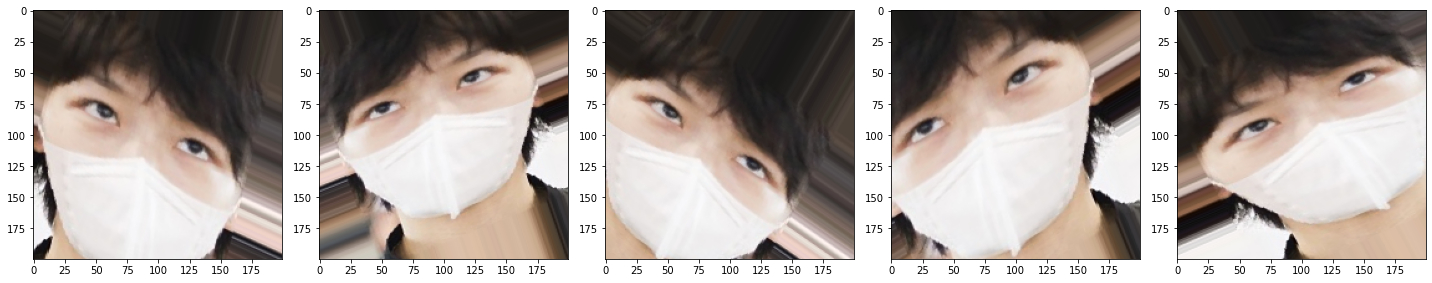

In [8]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
# save best model using vall accuracy
model_path = 'Model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=3, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


2022-04-15 13:32:03.846429: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/pallavi.gtide.co/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/50
 3/31 [=>............................] - ETA: 35s - loss: 1.0053 - accuracy: 0.4784

/Users/pallavi.gtide.co/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


31/31 [==============================] - ETA: 0s - loss: 0.8045 - accuracy: 0.6476
Epoch 1: val_accuracy improved from -inf to 0.40600, saving model to Model/model.h5
31/31 [==============================] - 77s 2s/step - loss: 0.8045 - accuracy: 0.6476 - val_loss: 1.1321 - val_accuracy: 0.4060
Epoch 2/50
31/31 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.8004
Epoch 2: val_accuracy improved from 0.40600 to 0.67327, saving model to Model/model.h5
31/31 [==============================] - 73s 2s/step - loss: 0.5683 - accuracy: 0.8004 - val_loss: 0.7150 - val_accuracy: 0.6733
Epoch 3/50
31/31 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.8373
Epoch 3: val_accuracy improved from 0.67327 to 0.84655, saving model to Model/model.h5
31/31 [==============================] - 78s 3s/step - loss: 0.4685 - accuracy: 0.8373 - val_loss: 0.4621 - val_accuracy: 0.8465
Epoch 4/50
31/31 [==============================] - ETA: 0s - loss: 0.4438 - accurac

31/31 [==============================] - ETA: 0s - loss: 0.2214 - accuracy: 0.9217
Epoch 29: val_accuracy did not improve from 0.97735
31/31 [==============================] - 111s 4s/step - loss: 0.2214 - accuracy: 0.9217 - val_loss: 0.0920 - val_accuracy: 0.9660
Epoch 30/50
31/31 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9199
Epoch 30: val_accuracy did not improve from 0.97735
31/31 [==============================] - 132s 4s/step - loss: 0.2083 - accuracy: 0.9199 - val_loss: 0.0853 - val_accuracy: 0.9757
Epoch 31/50
31/31 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9253
Epoch 31: val_accuracy improved from 0.97735 to 0.98018, saving model to Model/model.h5
31/31 [==============================] - 109s 4s/step - loss: 0.2089 - accuracy: 0.9253 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 32/50
31/31 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9248
Epoch 32: val_accuracy improved from 0.98018 to 0.

In [12]:
cnn_model.save('Model/model_last.h5')

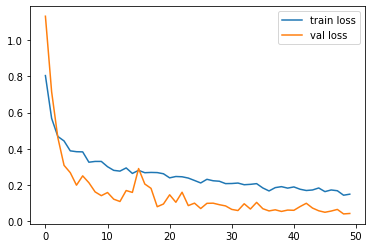

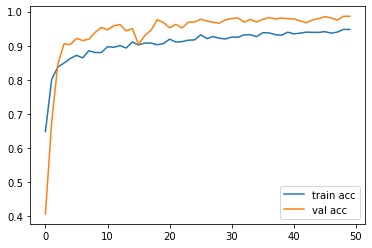

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history.history['accuracy'], label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')